<a href="https://colab.research.google.com/github/Jake0925/DeepLearning/blob/master/4_2_%EB%8B%A4%EC%A4%91_%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
torch.manual_seed(1)

여기서는 3개의 x로부터 하나의 y를 예측하는 문제입니다.

즉, 가설 수식은 H(x) = w1x1 + w2x2 + w3x3 + b 입니다.

In [ ]:
# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [ ]:
# nn.Linear()는 입력의 차원, 출력의 차원을 인수로 받습니다.
# 모델을 선언 및 초기화. 다중 선형 회귀이므로 input_dim=3, output_dim=1.
# 위 torch.nn.Linear 인자로 3, 1을 사용하였습니다.
# 3개의 입력 x에 대해서 하나의 출력 y을 가지므로, 입력 차원은 3, 출력 차원은 1을 인수로 사용하였습니다
model = nn.Linear(3,1)


In [ ]:
# model에는 3개의 가중치 w와 편향 b가 저장되어져 있습니다.
# 이 값은 model.parameters()라는 함수를 사용하여 불러올 수 있는데, 한 번 출력해보겠습니다.
# 첫번째 출력되는 것이 3개의 w고, 두번째 출력되는 것이 b에 해당됩니다.
# 두 값 모두 현재는 랜덤 초기화가 되어져 있습니다.
# 그리고 두 출력 결과 모두 학습의 대상이므로 requires_grad=True가 되어져 있는 것을 볼 수 있습니다.

print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.4139,  0.4772, -0.0361]], requires_grad=True), Parameter containing:
tensor([-0.2222], requires_grad=True)]


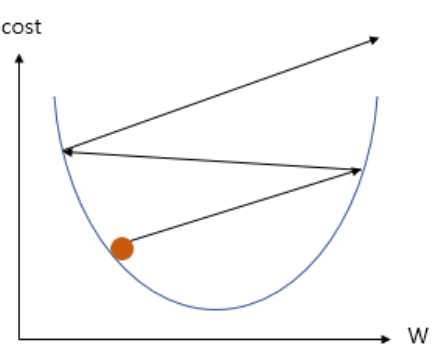![image.png]

위의 그림은 앞서 배웠던 내용으로, 학습률(learning rate)이 모델의 필요한 크기보다 높을 때, 기울기가 발산하는 현상을 보여줍니다

In [ ]:
# 이제 옵티마이저를 정의합니다
# model.parameters()를 사용하여 3개의 w와 b를 전달합니다.
# 학습률(learning rate)은 0.00001로 정합니다.
# 파이썬 코드로는 1e-5로도 표기합니다. 0.01로 하지 않는 이유는 기울기가 발산하기 때문입니다

optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [ ]:
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)
    # model(x_train)은 model.forward(x_train)와 동일함.

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward()
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 1.560038
Epoch  100/2000 Cost: 1.486888
Epoch  200/2000 Cost: 1.417583
Epoch  300/2000 Cost: 1.351954
Epoch  400/2000 Cost: 1.289780
Epoch  500/2000 Cost: 1.230888
Epoch  600/2000 Cost: 1.175097
Epoch  700/2000 Cost: 1.122252
Epoch  800/2000 Cost: 1.072198
Epoch  900/2000 Cost: 1.024783
Epoch 1000/2000 Cost: 0.979870
Epoch 1100/2000 Cost: 0.937337
Epoch 1200/2000 Cost: 0.897011
Epoch 1300/2000 Cost: 0.858862
Epoch 1400/2000 Cost: 0.822688
Epoch 1500/2000 Cost: 0.788428
Epoch 1600/2000 Cost: 0.755994
Epoch 1700/2000 Cost: 0.725258
Epoch 1800/2000 Cost: 0.696141
Epoch 1900/2000 Cost: 0.668566
Epoch 2000/2000 Cost: 0.642449


In [ ]:
# x에 임의의 입력 [73, 80, 75]를 넣어 모델이 예측하는 y의 값을 확인해보겠습니다.

# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]])
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var)
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y)

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[152.4962]], grad_fn=<AddmmBackward0>)


In [ ]:
# 학습 후의 3개의 w와 b의 값을 출력해보겠습니다.

print(list(model.parameters()))

[Parameter containing:
tensor([[0.9511, 0.6735, 0.3921]], requires_grad=True), Parameter containing:
tensor([-0.2156], requires_grad=True)]
